<a href="https://colab.research.google.com/github/pourmand1376/Polyp_detection/blob/main/Interpretability_KUMC_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

Sun May 15 08:42:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
%%bash
pip install gdown
gdown 1qPQuaZNTCZD6h7M2DtVY_avb-T_ZmVFr
mkdir KUMC
unzip KUMC.zip

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Downloading...
From: https://drive.google.com/uc?id=1qPQuaZNTCZD6h7M2DtVY_avb-T_ZmVFr
To: /content/KUMC.zip
100%|██████████| 3.18G/3.18G [00:27<00:00, 114MB/s]


In [4]:
%%bash
cd /content
git clone https://github.com/pourmand1376/yolov5-gradcam /content/yolov5-gradcam
cd /content/yolov5-gradcam/
pip install -r requirements.txt

fatal: destination path '/content/yolov5-gradcam' already exists and is not an empty directory.


In [7]:
%%bash
cd /content/yolov5-gradcam/
python main.py --model-path /content/drive/MyDrive/KUMC_v5l/runs/train/exp/weights/last.pt \
 --img-size 640 --img-path /content/KUMC/test2019/images \
 --output-dir out --names 'hyperplastic,adenomatous'

['16_9.jpg', '19_116.jpg', '13_98.jpg', '21_328.jpg', '3_79.jpg', '22_230.jpg', '16_104.jpg', '21_248.jpg', '24_12.jpg', '6_121.jpg', '15_151.jpg', '22_222.jpg', '4_90.jpg', '4_251.jpg', '17_202.jpg', '13_30.jpg', '8_115.jpg', '1_203.jpg', '17_34.jpg', '15_38.jpg', '11_316.jpg', '1_251.jpg', '23_52.jpg', '3_156.jpg', '13_31.jpg', '12_44.jpg', '16_137.jpg', '14_132.jpg', '4_52.jpg', '17_166.jpg', '1_260.jpg', '11_68.jpg', '9_182.jpg', '8_390.jpg', '17_142.jpg', '15_82.jpg', '11_210.jpg', '11_205.jpg', '21_102.jpg', '9_202.jpg', '8_226.jpg', '3_54.jpg', '17_21.jpg', '8_83.jpg', '19_153.jpg', '8_308.jpg', '11_1.jpg', '6_76.jpg', '24_7.jpg', '12_108.jpg', '21_388.jpg', '13_54.jpg', '12_159.jpg', '4_280.jpg', '16_63.jpg', '8_180.jpg', '22_178.jpg', '8_386.jpg', '1_472.jpg', '22_267.jpg', '1_325.jpg', '19_253.jpg', '8_415.jpg', '14_210.jpg', '19_56.jpg', '4_48.jpg', '19_60.jpg', '11_236.jpg', '1_126.jpg', '15_198.jpg', '10_16.jpg', '1_393.jpg', '1_459.jpg', '4_161.jpg', '4_107.jpg', '17_172.

Fusing layers... 
Model Summary: 367 layers, 46113663 parameters, 0 gradients
/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1033: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1033: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is depreca

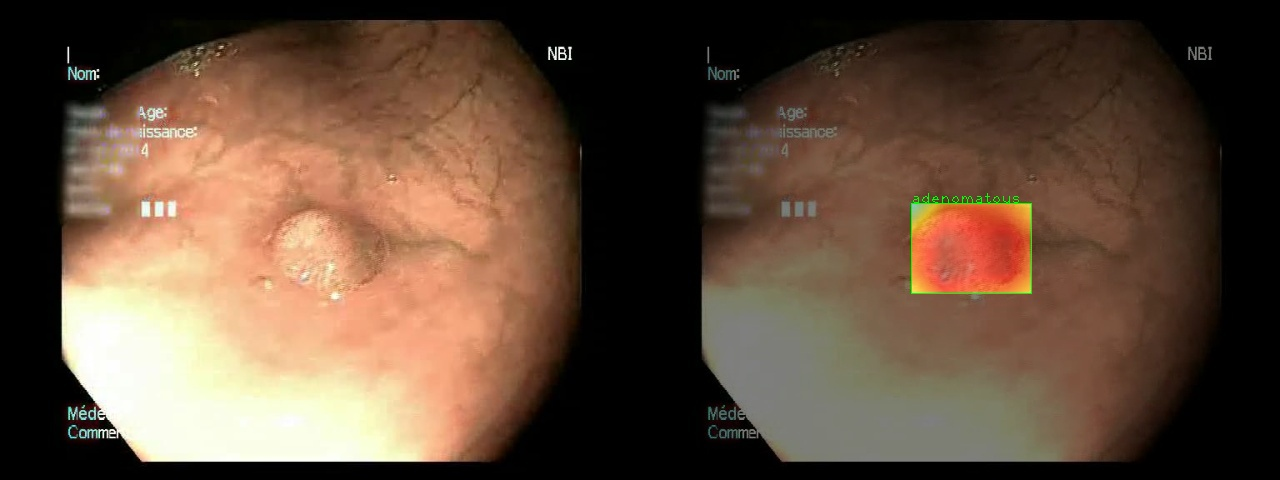

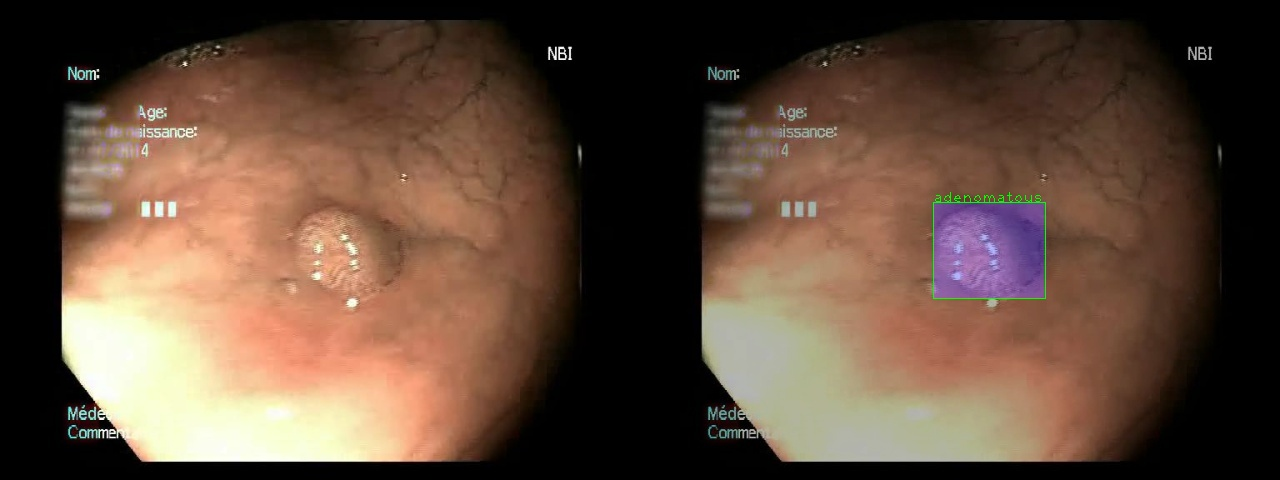

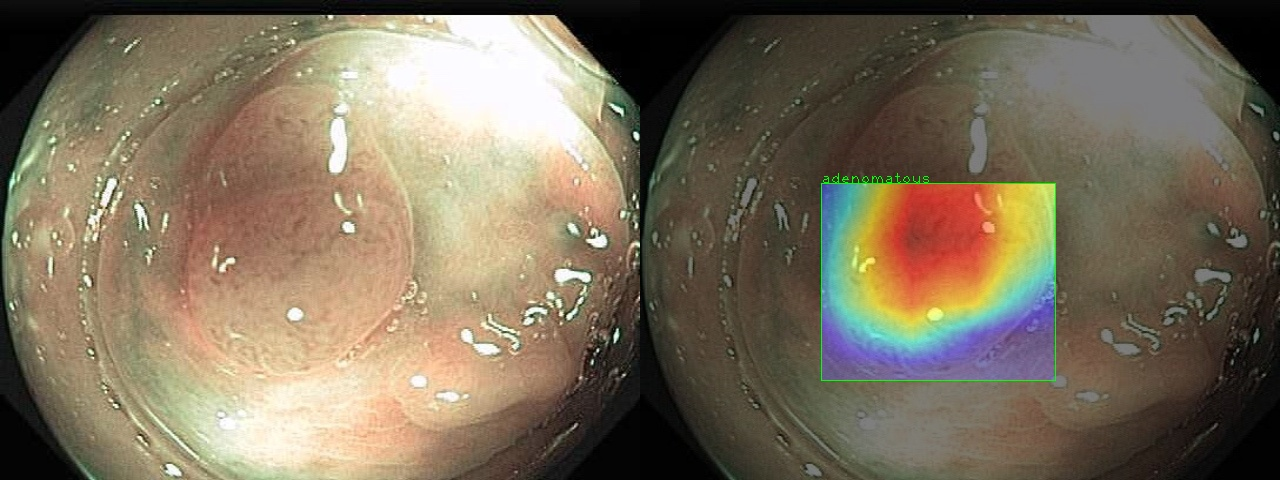

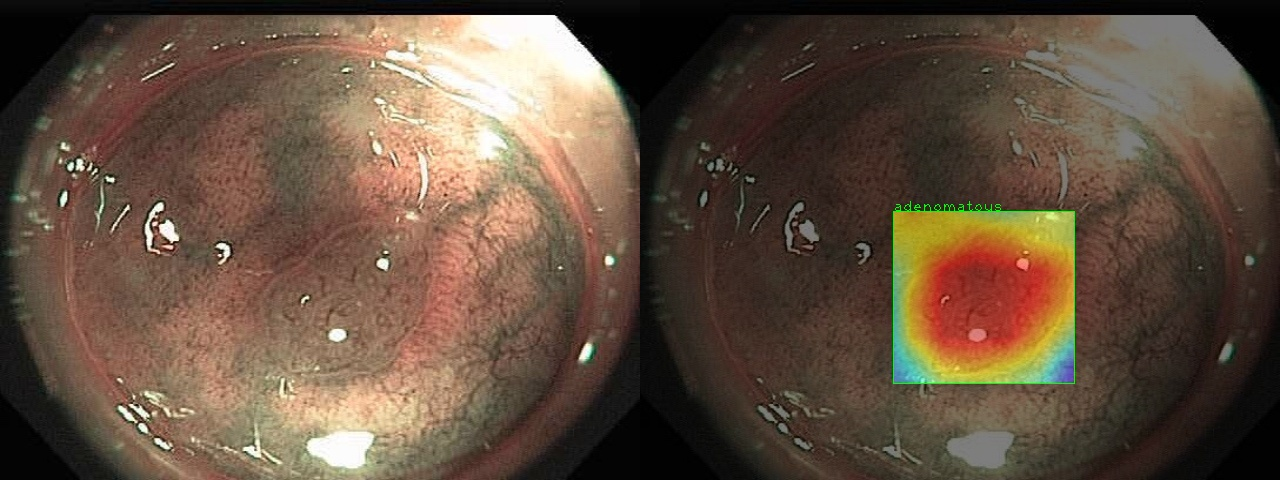

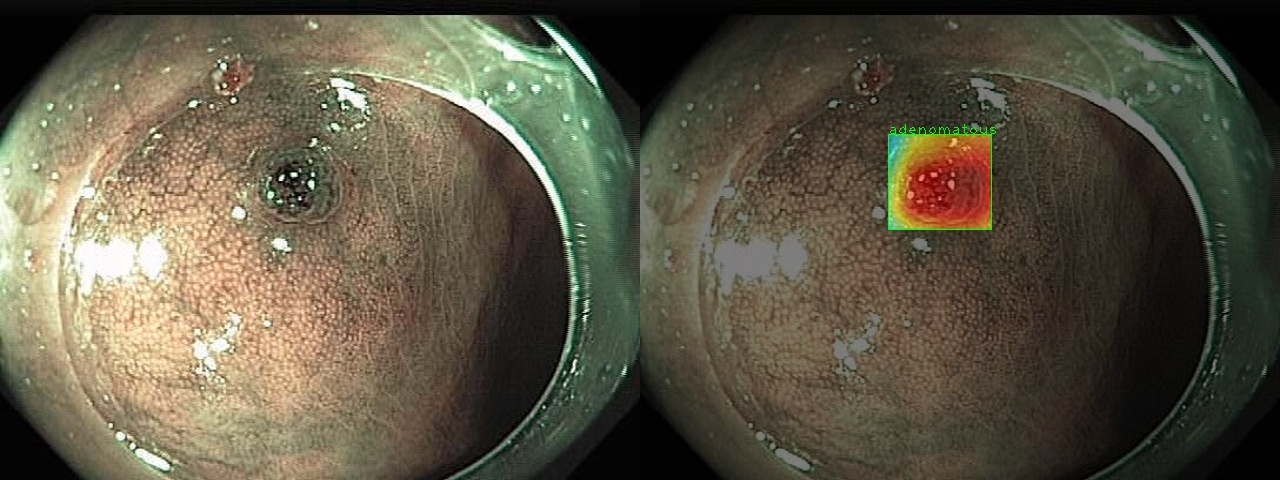

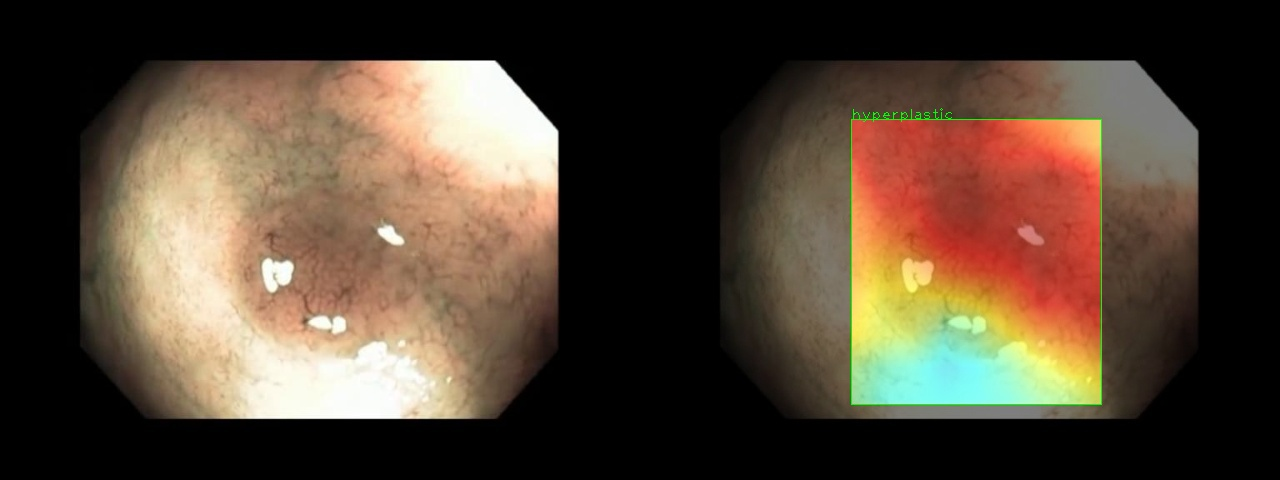

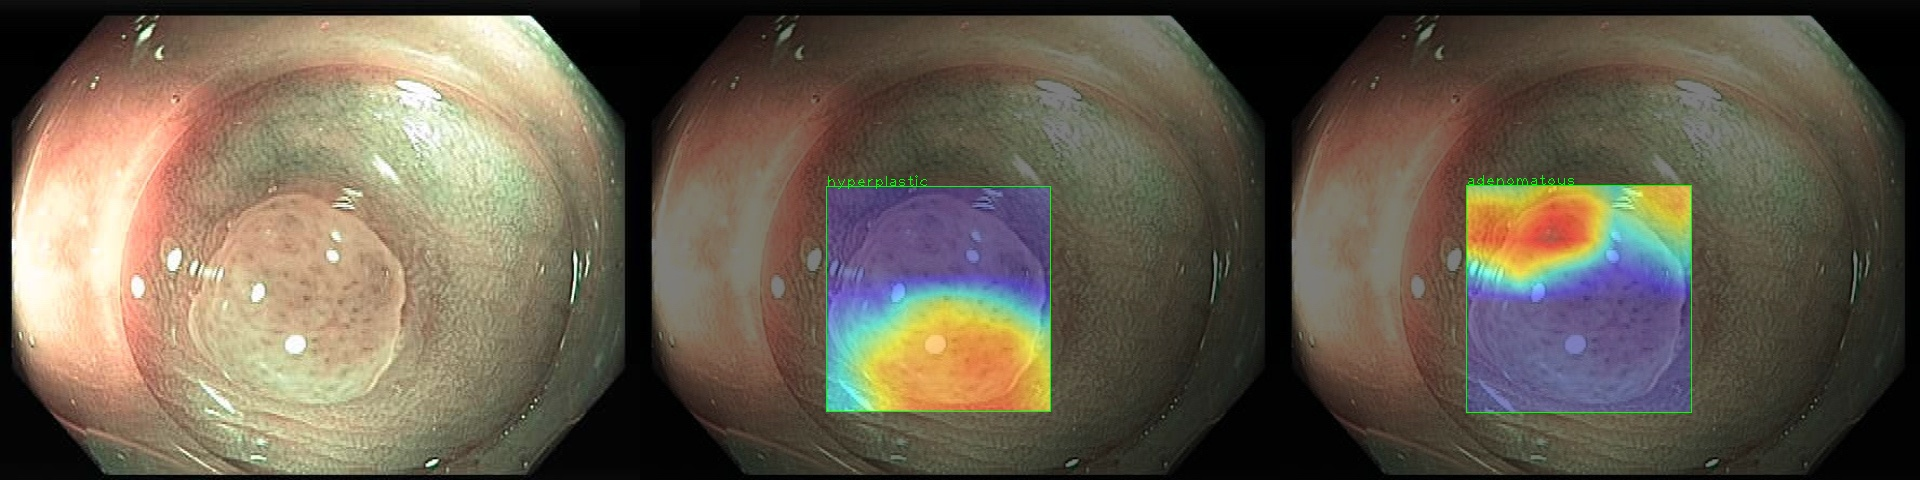

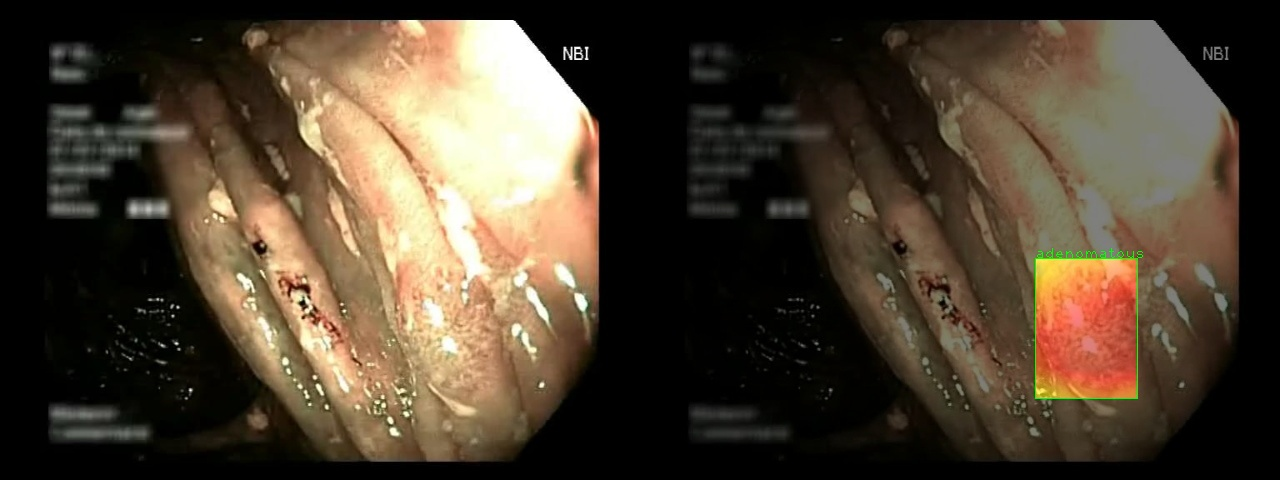

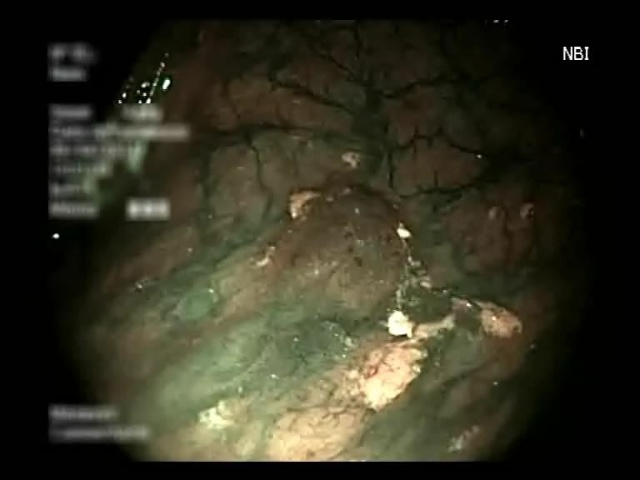

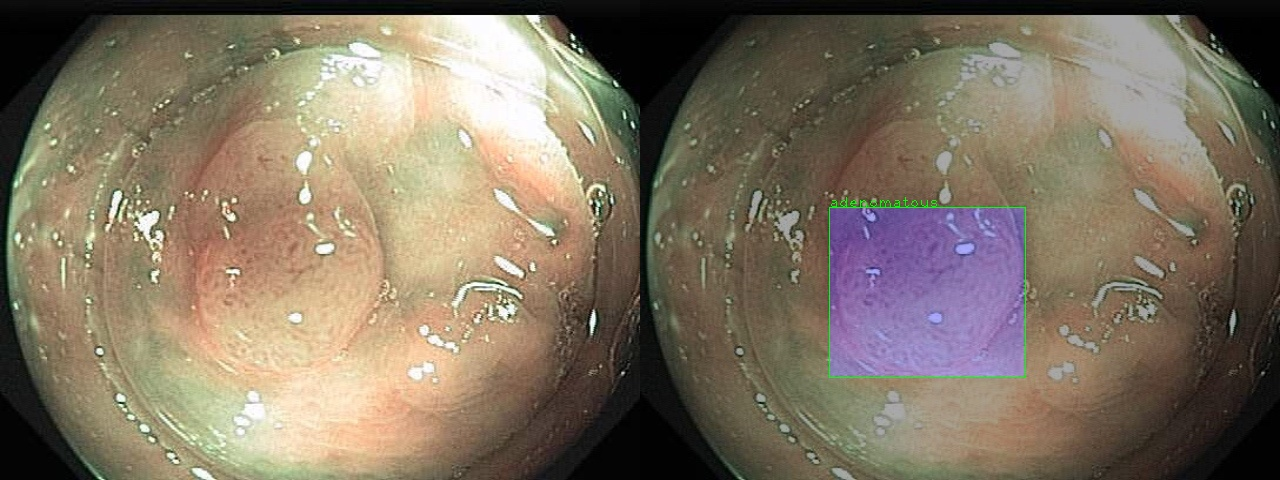

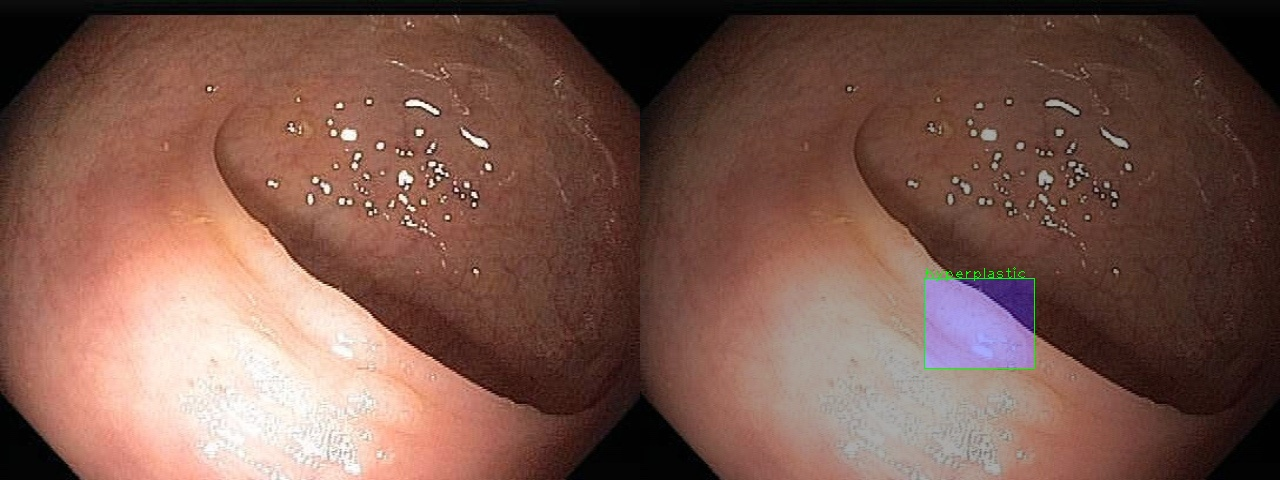

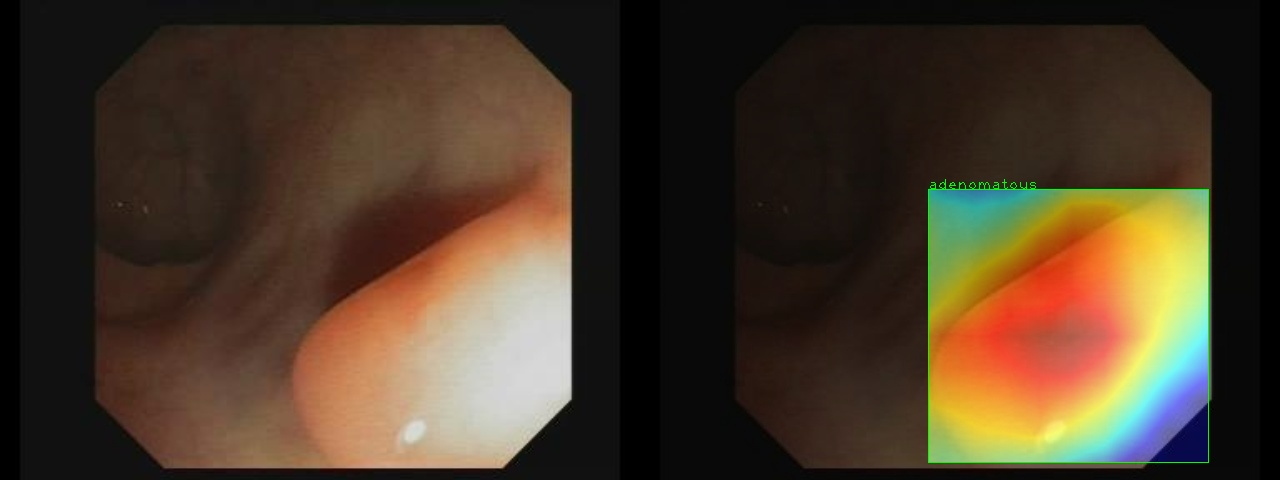

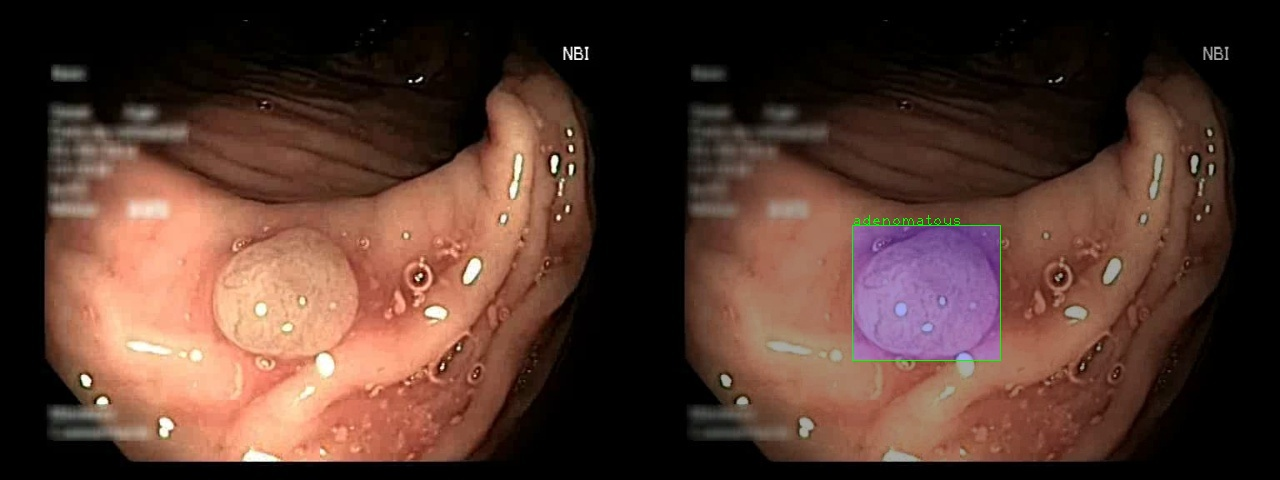

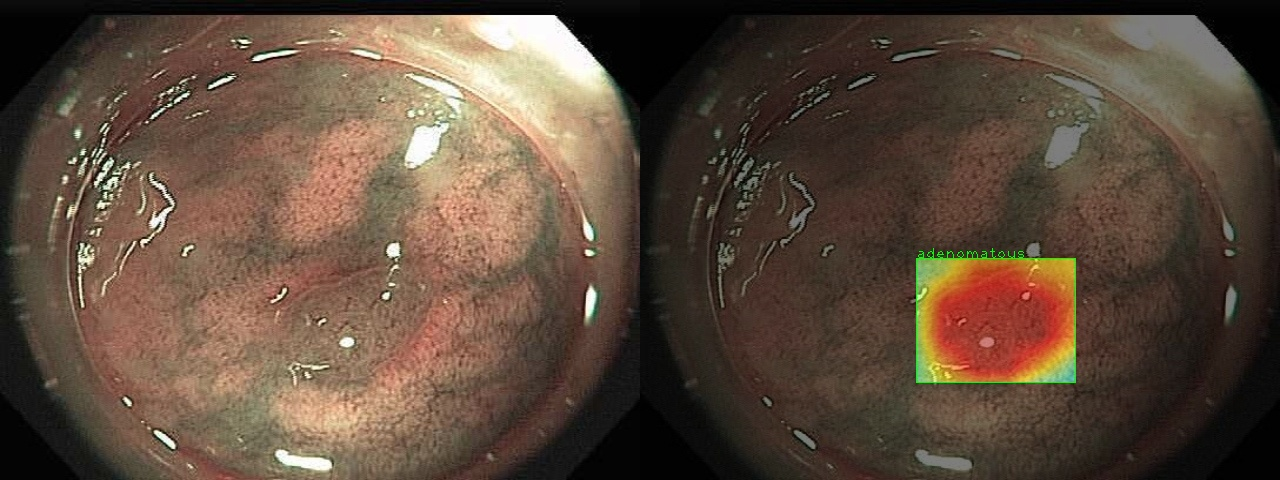

In [8]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5-gradcam/out/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")